In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [3]:
crash = pd.read_csv('Data/Crashes_in_the_district_of_Columbia.csv')

Trap_GC_Crash= pd.read_csv('crash_vs_trap.csv')
Crash_GC_trap= pd.read_csv('trap_vs_crash.csv')

mv2009 = pd.read_csv('moving_violations2009.csv')
mv2010 = pd.read_csv('moving_violations2010.csv')
mv2011 = pd.read_csv('moving_violations2011.csv')
mv2012 = pd.read_csv('moving_violations2012.csv')
mv2013 = pd.read_csv('moving_violations2013.csv')
mv2014 = pd.read_csv('moving_violations2014.csv')
mv2015 = pd.read_csv('moving_violations2015.csv')
mv2016 = pd.read_csv('moving_violations2016.csv')

/Users/samuelstack/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
TICKETS = pd.concat([mv2009, mv2010, mv2011,mv2012,mv2013,mv2014,mv2015,mv2016])

In [51]:
TICKETS.columns.values

array(['LONGITUDE', 'LATITUDE', 'TICKETTYPE', 'FINEAMT',
       'ACCIDENTINDICATOR', 'VIOLATIONDESC', 'DATE'], dtype=object)

In [ ]:
[['\xef\xbb\xbfX', 'Y','MAJORINJURIES','FATALITIES','WEATHER']]

Vizualization Ideas



- Money derived from tickets aggregated by the yearly level and crashes by year
sns plots in this notebook

- Map showing locations where Crashes Granger Caused Traps (TvC)
Crash_GC_trap= pd.read_csv('trap_vs_crash.csv')

- Map showing where Traps Granger Caused Crashed.  (CvT)
Trap_GC_Crash= pd.read_csv('crash_vs_trap.csv')

- Map showing Crash Fatalities and where Crashes Granger Caused Traps
cgct_death.to_csv('Crash_gc_Trap_deaths.csv')
tgcc_death.to_csv('Trap_gc_Crash_deaths.csv')
-

In [5]:
TICKETS.drop('Unnamed: 0', axis =1, inplace = True)
TICKETS['DATE'] = pd.to_datetime(TICKETS['TICKETISSUEDATE'], format = '%Y-%m-%d')
TICKETS.drop('TICKETISSUEDATE', axis =1, inplace = True)

### Tickets given out by type

In [12]:
tick_counts = TICKETS['VIOLATIONDESC'].value_counts()
#sns.barplot(TICKETS['VIOLATIONDESC'])

In [46]:
# Distribution of ticlet types
ticks = pd.DataFrame(TICKETS['VIOLATIONDESC'].value_counts())
ticks = ticks[ticks['VIOLATIONDESC'] > 5000]
ticks.to_csv('ticket_type_counts.csv')

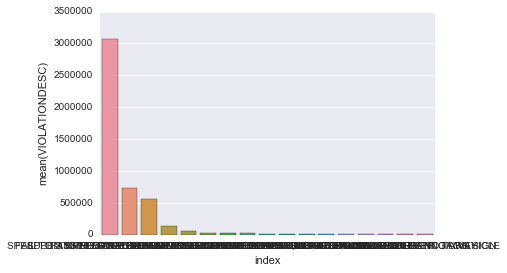

In [48]:
ticks.reset_index(inplace = True)
sns.barplot(x = ticks['index'], y = ticks['VIOLATIONDESC'])

In [164]:
ticks.head(10)

,index,VIOLATIONDESC
0,SPEED 11-15 MPH OVER THE SPEED LIMIT,3062818
1,SPEED 16-20 MPH OVER THE SPEED LIMIT,740417
2,FAIL TO STOP PER REGULATIONS FACING RED SIGNAL,562559
3,SPEED 21-25 MPH OVER THE SPEED LIMIT,140873
4,PASSING STOP SIGN WITHOUT COMING TO A FULL STOP,64869
5,SPEED 26-30 MPH OVER THE SPEED LIMIT,32194
6,"DISTRACTED DRIVING USING CELL PHONE, OTHER DEVICE",31075
7,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,22471
8,TURNING LEFT WHERE LEFT TURNS ARE PROHIBITED,19810
9,OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH,19169


### Revenue by Year from tickets

In [58]:
revenue = pd.DataFrame(TICKETS['FINEAMT'].groupby(TICKETS['DATE'].dt.year).sum())
revenue.reset_index(inplace=True)
#revenue.to_csv('yearly_revenue.csv')


In [172]:
revenue['FINEAMT']=revenue['FINEAMT'].astype(str)

In [173]:
revenue

,DATE,FINEAMT
0,2009,51197276.0
1,2010,62336159.0
2,2011,22159137.01
3,2012,129836261.0
4,2013,55281967.0
5,2014,48821340.5
6,2015,108275024.0
7,2016,45790362.0


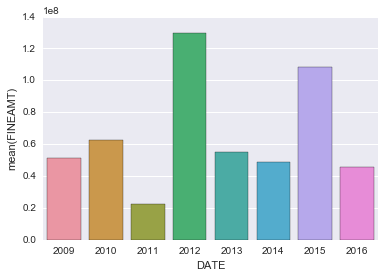

In [169]:
sns.barplot(x = revenue['DATE'], y = revenue['FINEAMT'])

### Crashes per Year

I think i can gather this from the dbscan_data.csv


In [85]:
data = pd.read_csv('dbscan_data.csv')

In [86]:
data.columns.values

array(['Unnamed: 0', 'CRASH', 'DATE', 'LATITUDE', 'LONGITUDE', 'TRAP'], dtype=object)

In [87]:
data.dropna(inplace = True)

In [89]:
data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y-%m-%d')

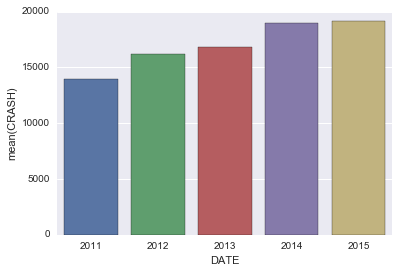

In [93]:
yearly_crash = pd.DataFrame(data['CRASH'].groupby(data['DATE'].dt.year).sum())
yearly_crash.reset_index(inplace = True)
yearly_crash = yearly_crash[(yearly_crash['DATE']> 2010)]
yearly_crash = yearly_crash[(yearly_crash['DATE']< 2016)]
sns.barplot(x = yearly_crash['DATE'], y = yearly_crash['CRASH'])

### Tickets Per Year

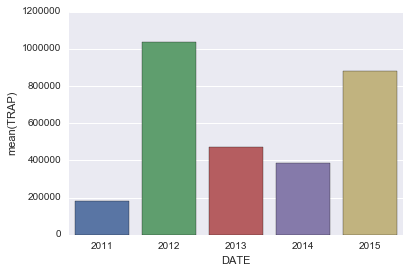

In [92]:
yearly_trap = pd.DataFrame(data['TRAP'].groupby(data['DATE'].dt.year).sum())
yearly_trap.reset_index(inplace = True)
yearly_trap = yearly_trap[(yearly_trap['DATE']> 2010)]
yearly_trap = yearly_trap[(yearly_trap['DATE']< 2016)]
sns.barplot(x = yearly_trap['DATE'], y = yearly_trap['TRAP'])

### Crash falalities and injuries

In [136]:
# Getting the location of crashes that resulted in deaths for plotting
fatality = crash[['\xef\xbb\xbfX', 'Y','FATALITIES']]

In [137]:
fatality.rename(columns = {'\xef\xbb\xbfX':'Longitude', 'Y':'Latitude'}, inplace = True)

In [138]:
fatality.dropna(inplace = True)

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [139]:
fatality[['Latitude','Longitude']] = fatality[['Latitude','Longitude']].round(3)

In [142]:
#fatality['Event'] = 'death'
fatality.drop('FATALITIES', axis =1 , inplace = True)

/Users/samuelstack/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [123]:
#TgcC = Traps Granger Cause Crashes
#Trap_GC_Crash.head()
#TgcC = Trap_GC_Crash[['Lag Period','Latitude','Longitude']]
TgcC.rename(columns = {'Lag Period':'Event'}, inplace = True)

In [126]:
#CgcT = Crashes Granger Cause Traps
#Crash_GC_trap.head()
#CgcT = Crash_GC_trap[['Lag Period','Latitude','Longitude']]
CgcT.rename(columns = {'Lag Period':'Event'}, inplace = True)

In [144]:
# Granger Caused Traps and Crashes over layed with the location of deaths. 
tgcc_death = pd.concat([TgcC, fatality])
cgct_death = pd.concat([CgcT, fatality])

In [150]:
fatality.rename(columns={'Event':'Died'}, inplace = True)

In [157]:
#result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
herp = pd.merge(left = TgcC, right = fatality, on = ['Longitude','Latitude'])

In [ ]:
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)

In [160]:
# Traps that Granger caused Crashes where Deaths occured.  

herp.dropna(inplace = True)
herp.to_csv('traps_GC_Deaths.csv')

In [162]:
# Crashes that Granger caused traps were Deaths occured.
derp = pd.merge(left = CgcT, right = fatality, on = ['Longitude','Latitude'])
derp.dropna(inplace = True)
derp.to_csv('deaths_GC_crashes.csv')

In [146]:
cgct_death.to_csv('Crash_gc_Trap_deaths.csv')
tgcc_death.to_csv('Trap_gc_Crash_deaths.csv')